<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [61]:
df.head(100)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
95,Cameroon,96,131,106.0,129.0,129.0,90.0,120.0,91.0,121.0,141.0
96,Bulgaria,97,47,117.0,13.0,18.0,115.0,147.0,112.0,56.0,65.0
97,Ghana,98,129,92.0,72.0,132.0,91.0,117.0,52.0,114.0,121.0
98,Ivory Coast,99,134,88.0,130.0,137.0,100.0,62.0,114.0,118.0,147.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

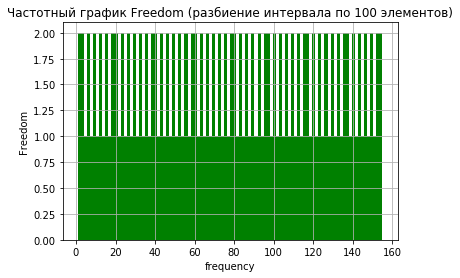

In [137]:
n, bins, patches = plt.hist(df['Freedom'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

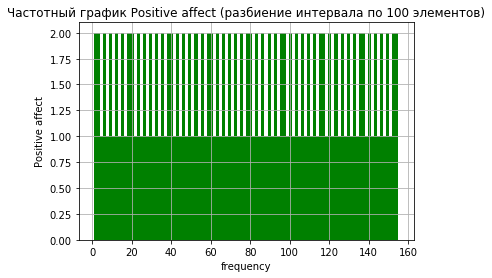

In [24]:
n, bins, patches = plt.hist(df['Positive affect'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

In [ ]:
#Параметры Freedom и positive affect имеют равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [160]:
#Убираю пустые значения из Датафрейма
freedom = df['Freedom'].dropna() 

#медиана
num_freedom = len(freedom)
sorted_freedom = sorted(freedom)
middle = (num_freedom // 2)
if num_freedom%2==0:
  result = (sorted_freedom[middle-1] + sorted_freedom[middle])/2
else:
  result = sorted_freedom[middle]
print('Медиана =', result)

#мода

freedom_counts = {}
for p in freedom:
    if p not in freedom_counts:
        freedom_counts[p] = 1
    else:
        freedom_counts[p] += 1

maxp = 0
mode_freedom = None
for k, v in freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_duration = k
print('Значение моды =', mode_duration, 'Количество встречаемости =', maxp)


#математическое ожидание

print('Математическое ожидание = ' + str(statistics.mean(freedom)))

#стандартное отклонение

print('Cтандартное отклонение = ' + str(statistics.pstdev(freedom)))

#дисперсию

print('Дисперсия = ' + str(statistics.pvariance(freedom)))


#минимум и максимум

print('Минимум = ' + str(min(freedom)) + ', максимум = ' + str(max(freedom)))

#размах

freedom_range = max(freedom) - min(freedom)
print('Размах = ' + str(freedom_range))



Медиана = 78.0
Значение моды = 5.0 Количество встречаемости = 1
Математическое ожидание = 78.0
Cтандартное отклонение = 44.74371464239419
Дисперсия = 2002.0
Минимум = 1.0, максимум = 155.0
Размах = 154.0


In [166]:
#найти выбросы (если есть) 

print('Количество выбросов (пустых строк) =', df.Freedom.isnull().sum())

Количество выбросов (пустых строк) = 1


Почему нельзя найти моду?

In [0]:
Потому что каждое значение в Freedom присутствует в количестве 1 шт. 

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

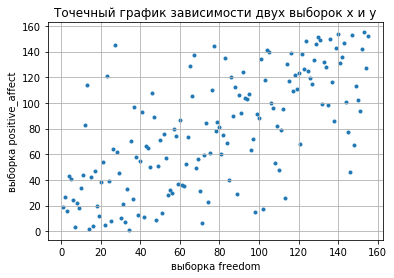

In [91]:
# Графический способо

freedom = df['Freedom']
positive_affect = df['Positive affect']
plt.xlabel('выборка freedom')
plt.ylabel('выборка positive_affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [93]:
positive_affect.isnull().sum()

1

In [97]:
from scipy.stats import pearsonr
freedom = df['Freedom'].dropna()
positive_affect = df['Positive affect'].dropna()
corr, p_value = pearsonr(freedom, positive_affect)
print('Коэффициент Пирсона для Freedom и Positive affect =', corr)

Коэффициент Пирсона для Freedom и Positive affect = 0.6817698430601656


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [102]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))
print('Так как среднее значение равно 0, то нормализация не нужна.')

0.0
Так как среднее значение равно 0, то нормализация не нужна.


Построить матрицу корреляций для всех колонок таблицы

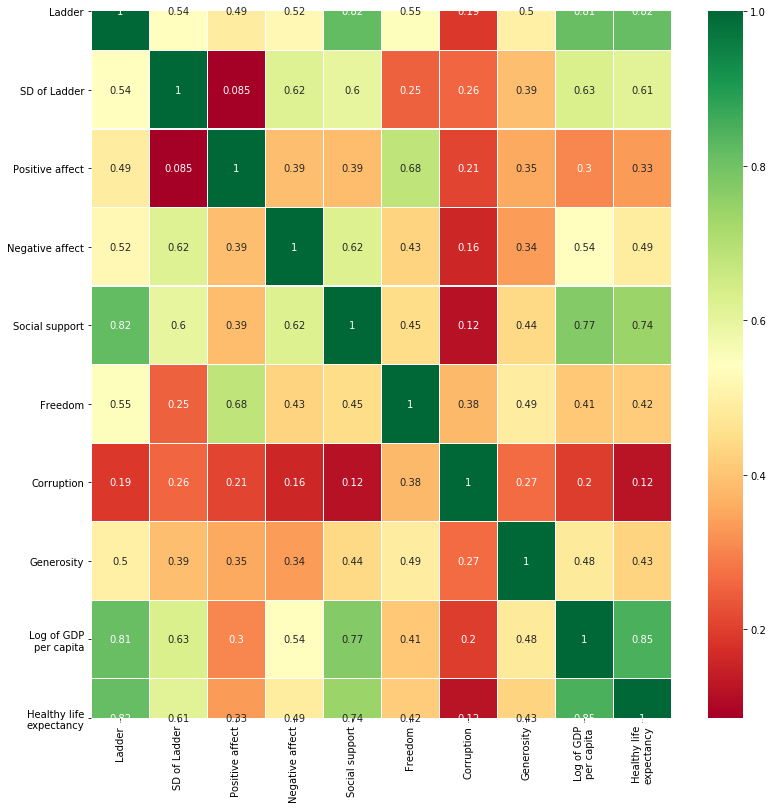

In [109]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(13,13)
plt.show()


Загрузить таблицу цен на авокадо: 

In [140]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

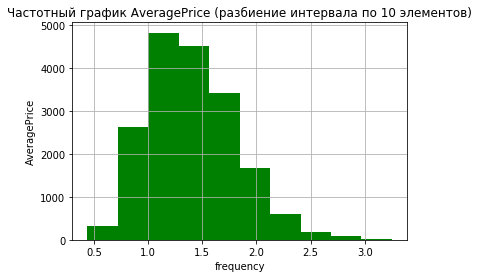

In [141]:
n, bins, patches = plt.hist(df['AveragePrice'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

#Это нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

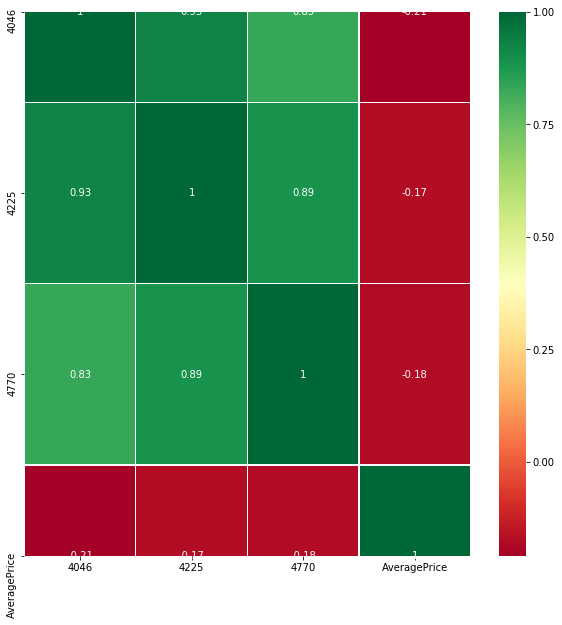

In [145]:
import seaborn as sns
new_df = df[['4046', '4225', '4770', 'AveragePrice']]
sns.heatmap(new_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()


Если корелляция есть (обратная или прямая), то какие выводы можно сделать?


Есть сильная положительная корелляция между разными сортами авокадо. Видимо если есть высокий урожай одного сорта, то так же можно ожидать высокий урожай и других двух сортов
А вот корелляция между сортами авокадо и средней ценой слабая и негативная